# **HOMEWORK 3**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## **Functions**

In [2]:
def plot2(img1, title_img1, img2, title_img2):
  plt.subplot(121)
  plt.axis('off')
  plt.imshow(img1, cmap = 'gray')
  plt.title(title_img1, size = 16)

  plt.subplot(122)
  plt.axis('off')
  plt.imshow(img2, cmap = 'gray')
  plt.title(title_img2, size = 16)

In [3]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    """Utility for drawing lines."""
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

In [4]:
def separate_left_right_lines(lines):
    """Separate left and right lines depending on the slope."""
    left_lines = []
    right_lines = []
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                if y1 > y2: # Negative slope = left lane.
                    left_lines.append([x1, y1, x2, y2])
                elif y1 < y2: # Positive slope = right lane.
                    right_lines.append([x1, y1, x2, y2])
    return left_lines, right_lines

In [5]:
def cal_avg(values):
    """Calculate average value."""
    if not (type(values) == 'NoneType'):
        if len(values) > 0:
            n = len(values)
        else:
            n = 1
        return sum(values) / n

In [6]:
def extrapolate_lines(lines, upper_border, lower_border):
    """Extrapolate lines keeping in mind the lower and upper border intersections."""
    slopes = []
    consts = []

    if lines is not None:
        for x1, y1, x2, y2 in lines:
            slope = (y1-y2) / (x1-x2)
            slopes.append(slope)
            c = y1 - slope * x1
            consts.append(c)
    avg_slope = cal_avg(slopes)
    avg_consts = cal_avg(consts)

    # Calculate average intersection at lower_border.
    x_lane_lower_point = int((lower_border - avg_consts) / avg_slope)

    # Calculate average intersection at upper_border.
    x_lane_upper_point = int((upper_border - avg_consts) / avg_slope)

    return [x_lane_lower_point, lower_border, x_lane_upper_point, upper_border]

In [7]:
def draw_circle(img, circles, color_line = (255, 0, 255), thickness = 3):
  if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])

            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, color_line, thickness)

            # display the radius
            font = cv2.FONT_HERSHEY_PLAIN
            text = f'R: {radius}'
            cv2.putText(img, text, (i[0] - radius // 2 - 5, i[1] + 3), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)

## **Task 1: Line Detection**

**Rotate the image by 33°**

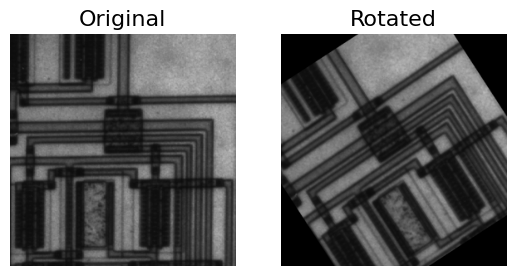

In [8]:
# Load the image
img = cv2.imread('circuit.png', cv2.IMREAD_COLOR)

# Get image dimensions
h, w = img.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Define the rotation matrix
angle = 33  # Angle in degrees
scale = 1.0
M = cv2.getRotationMatrix2D(center, angle, scale)

# Perform the rotation
rotated_img = cv2.warpAffine(img, M, (w, h))

# Display the image
plot2(img, "Original", rotated_img, "Rotated")

**Edge detection using Canny function**

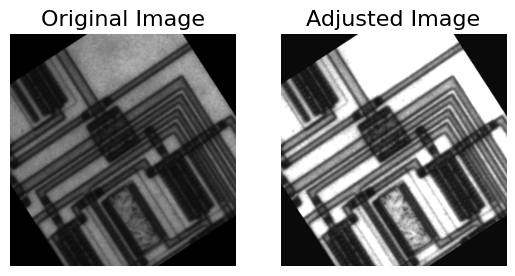

In [9]:
# Define alpha (contrast) and beta (brightness) values
alpha = 2.2  # Contrast control (1.0-3.0)
beta = -10  # Brightness control (0-100)

# Adjust the contrast and brightness
a_rotated_img = cv2.convertScaleAbs(rotated_img, alpha=alpha, beta=beta)

# Display the original and adjusted images
plot2(rotated_img, 'Original Image', a_rotated_img, 'Adjusted Image')

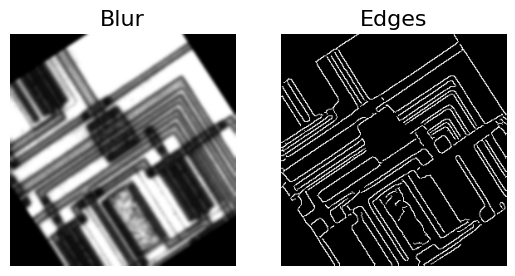

In [67]:
# Convert to grayscale
rotated_img_gray = cv2.cvtColor(a_rotated_img, cv2.COLOR_BGR2GRAY)

# Blur
blur_img = cv2.GaussianBlur(rotated_img_gray, (9,9), 0)

# Perform Edge Detection.
low_threshold = 20
high_threshold = 150
canny_blur = cv2.Canny(blur_img, low_threshold, high_threshold)

# Plot
plot2(blur_img, "Blur", canny_blur, "Edges")

**Using Hough Transform to find lines**

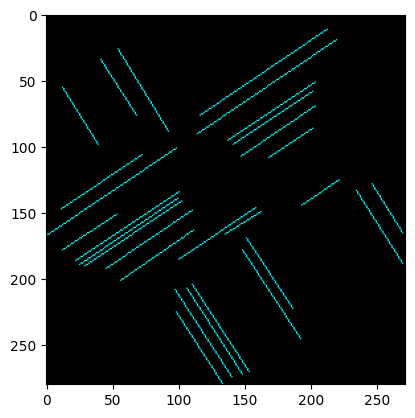

In [131]:
# Declare parameters
rho = 1.6
theta = np.pi / 180
threshold = 125
min_line_len = 25
max_line_gap = 2

# Apply HoughLinesP()
lines = cv2.HoughLinesP(canny_blur, rho, theta, threshold,
                        minLineLength = min_line_len,
                        maxLineGap = max_line_gap)

# Create a blank image
hough = np.zeros_like(img)

# Draw all lines found onto the hough image
draw_lines(hough, lines, color = (0,255,255), thickness = 1)

# Plot
plt.imshow(hough)

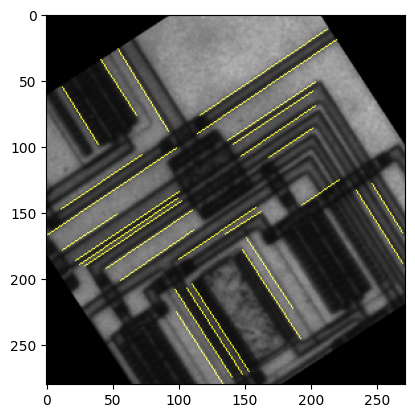

In [132]:
alpha = 1
beta = 1
gamma = 0
image_annotated = cv2.addWeighted(rotated_img, alpha, hough, beta, gamma)

# Display the results
plt.imshow(image_annotated[:,:,::-1])

## **Task 2: Circle Detection**

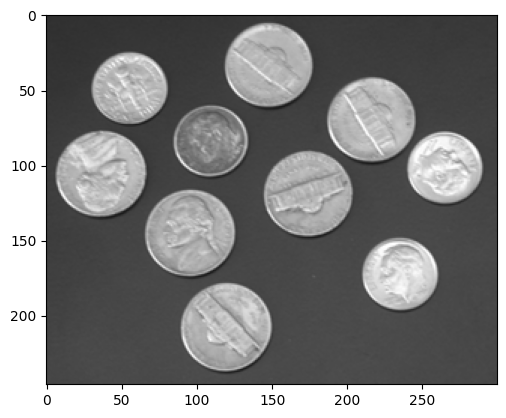

In [ ]:
# Load image
circle_img = cv2.imread("coins.png", cv2.IMREAD_COLOR)

plt.imshow(circle_img[:,:,::-1])

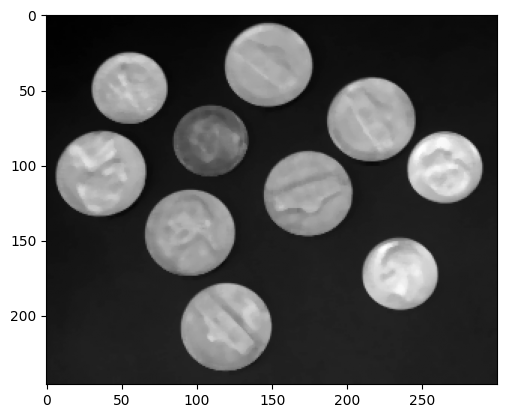

In [ ]:
# Create a grayscale version of the image
gray_circle_img = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY)

# Blur
gray_blur = cv2.medianBlur(gray_circle_img, 5)

# Plot
plt.imshow(gray_blur, cmap = "gray")

In [ ]:
# Minimum distance between detected centers
rows = gray_blur.shape[0]

# Detect circles using HoughCircles()
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, rows / 12,
                            param1 = 120, param2 = 35,
                            minRadius= 1, maxRadius= 40)

(-0.5, 299.5, 245.5, -0.5)

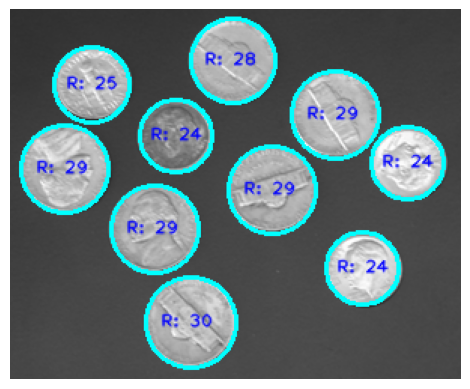

In [ ]:
# Draw circles and display their radius
draw_circle(circle_img, circles, thickness = 2, color_line = (0,255,255))

# Plot
plt.imshow(circle_img)
plt.axis('off')

## **Tutorial**

### **Template Matching:  Finding Waldo**

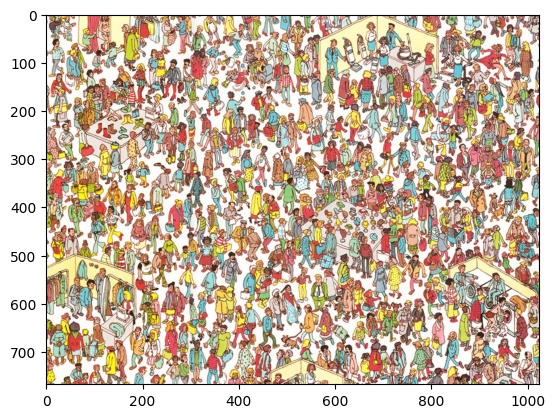

In [ ]:
# Load template
template = cv2.imread("waldo2.png", 0)

# The width and height of template
w, h = template.shape[::-1]

# Load the image and create a grayscale version
img_tut = cv2.imread("find_waldo2.jpg", cv2.IMREAD_COLOR)
img_tut_gray = cv2.cvtColor(img_tut, cv2.COLOR_BGR2GRAY)

# Plot image
plt.imshow(img_tut[:,:,::-1])

In [ ]:
# Template Matching
template_match = cv2.matchTemplate(img_tut_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.7

# Finding value >= threshold
loc = np.where(template_match >= threshold)

# Create a rectangle around where the template is found in the image
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_tut, pt, (pt[0] + w, pt[1] + h), (255, 255, 0), 2)

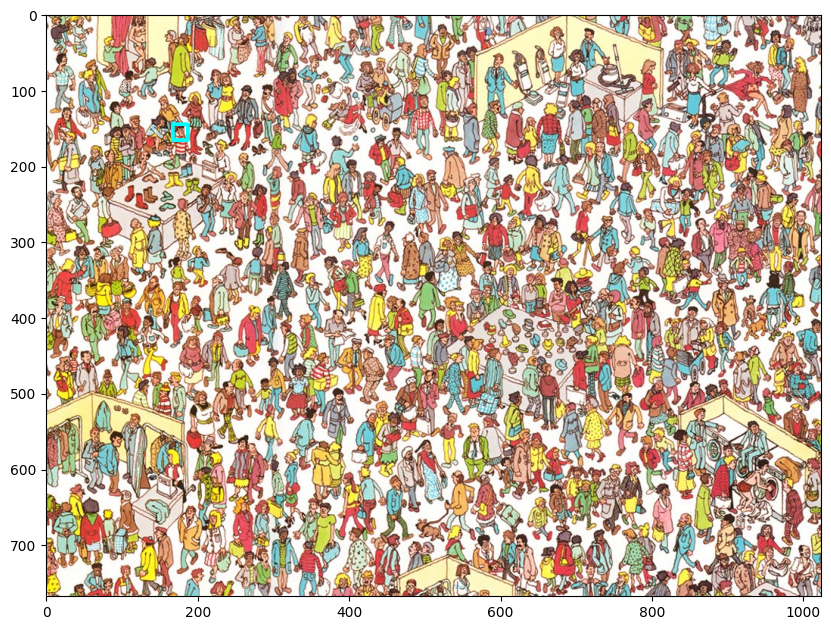

In [ ]:
# Plot found-waldo image
cv2.imwrite('found_waldo.png', img_tut)

plt.figure(figsize = (10, 8))
plt.imshow(img_tut[:,:,::-1])

### **Lane Detection**

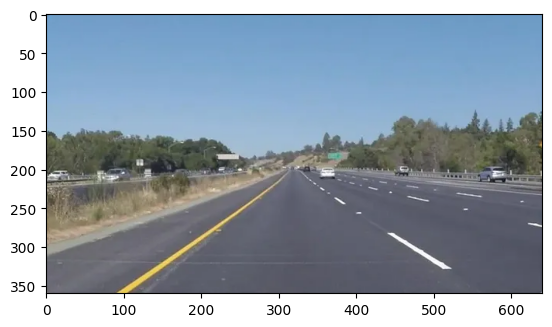

In [ ]:
# Load and show image
img_lane = cv2.imread("lane2.webp")

plt.imshow(img_lane[:,:,::-1])

**Create threshold for lane lines**

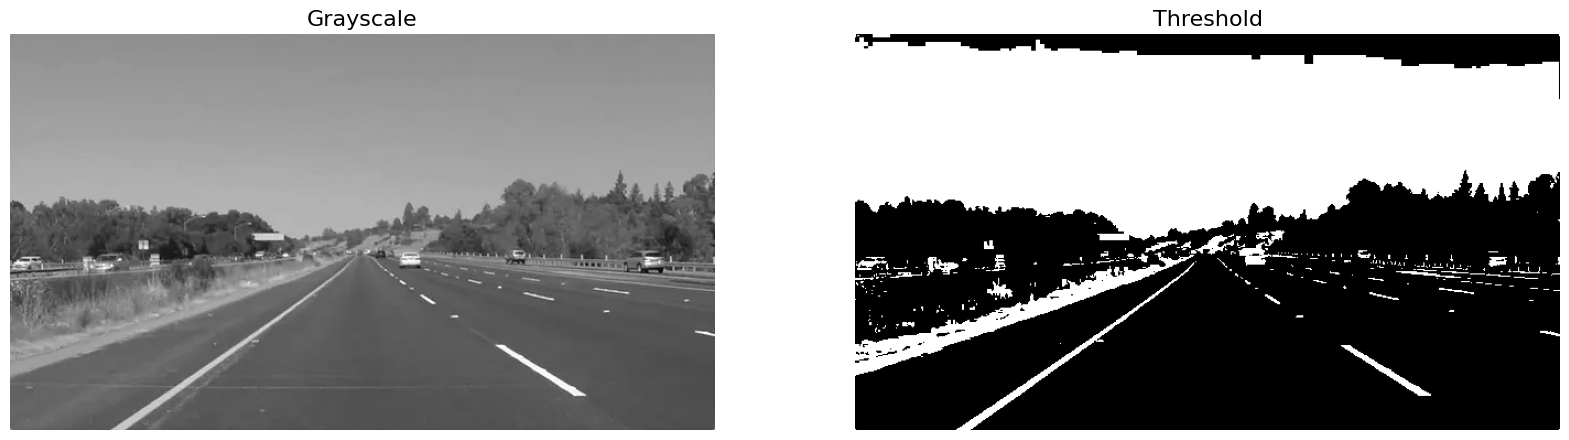

In [ ]:
# Convert to grayscale
img_lane_gray = cv2.cvtColor(img_lane, cv2.COLOR_BGR2GRAY)

# Use global threshold based on grayscale intensity.
img_threshold = cv2.inRange(img_lane_gray, 150, 255)

# Plot
plt.figure(figsize = (20, 10))
plot2(img_lane_gray, "Grayscale", img_threshold, "Threshold")

**Select the region of interest using fillPoly()**

In [ ]:
# Region masking
roi_vertices = np.array([[100, 350],
                        [550, 350],
                        [330, 200],
                        [310, 200]])

# Create a blank mask
mask = np.zeros_like(img_threshold)

In [ ]:
# Define a 3 channel or 1 channel color to fill the mask
if len(img_threshold.shape) > 2:
    channel_count = img_threshold.shape[2]  # 3 or 4 depending on the image
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

# Fill pixels inside the polygon
cv2.fillPoly(mask, [roi_vertices], ignore_mask_color)

# Construct the region of interest based on where mask pixels are nonzero
roi = cv2.bitwise_and(img_threshold, mask)

Text(0.5, 1.0, 'Isolated roi')

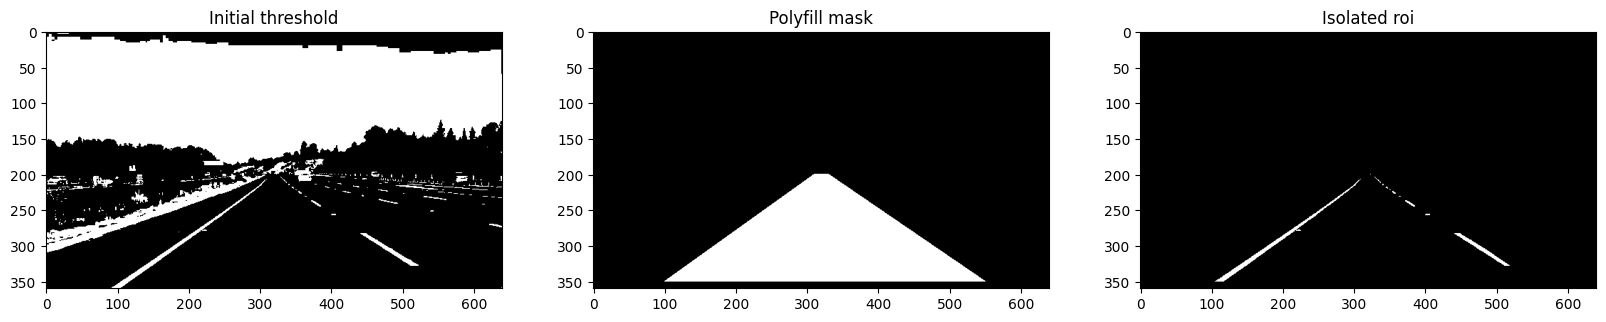

In [ ]:
# Plot
plt.figure(figsize = (20, 10))
plt.subplot(131);
plt.imshow(img_threshold, cmap = 'gray')
plt.title('Initial threshold')

plt.subplot(132)
plt.imshow(mask, cmap = 'gray')
plt.title('Polyfill mask')

plt.subplot(133)
plt.imshow(roi, cmap = 'gray')
plt.title('Isolated roi')

**Detect edges and smooth noise using Canny function**

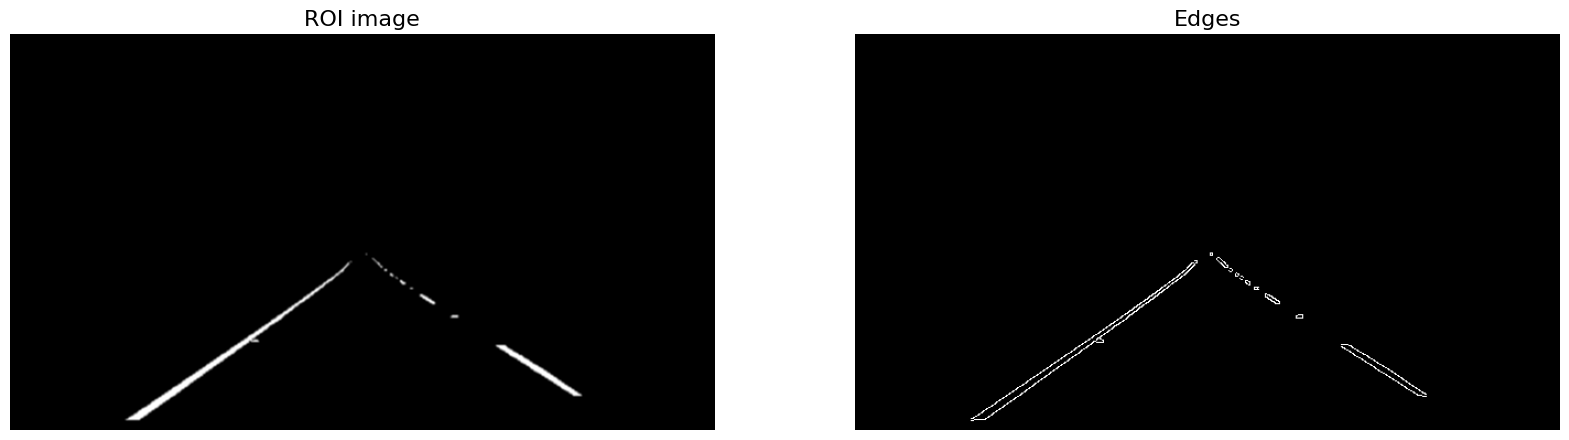

In [ ]:
# Smooth the roi image
roi_blur = cv2.GaussianBlur(roi, (3,3), 0)

# Perform Edge Detection.
low_threshold = 50
high_threshold = 100
canny_blur = cv2.Canny(roi_blur, low_threshold, high_threshold)

# Plot
plt.figure(figsize = (20, 10))
plot2(roi_blur, "ROI image", canny_blur, "Edges")

**Line Detection using HoughLinesP()**

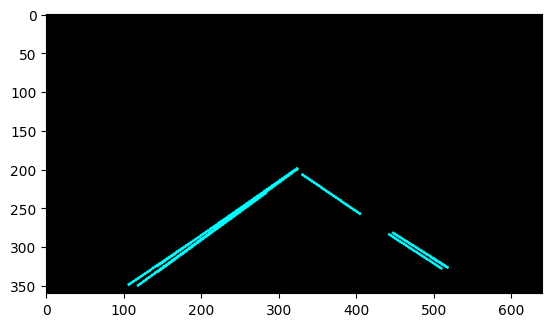

In [ ]:
# Declare parameters
rho = 1
theta = np.pi / 180
threshold = 42
min_line_len = 5
max_line_gap = 25

# Apply HoughLinesP()
lines = cv2.HoughLinesP(canny_blur, rho, theta, threshold,
                        minLineLength = min_line_len,
                        maxLineGap = max_line_gap)

# Create a blank image
hough = np.zeros((img_lane.shape[0], img_lane.shape[1], 3), dtype = np.uint8)

# Draw all lines found onto the hough image
draw_lines(hough, lines, color = (0,255,255))

# Plot
plt.imshow(hough)

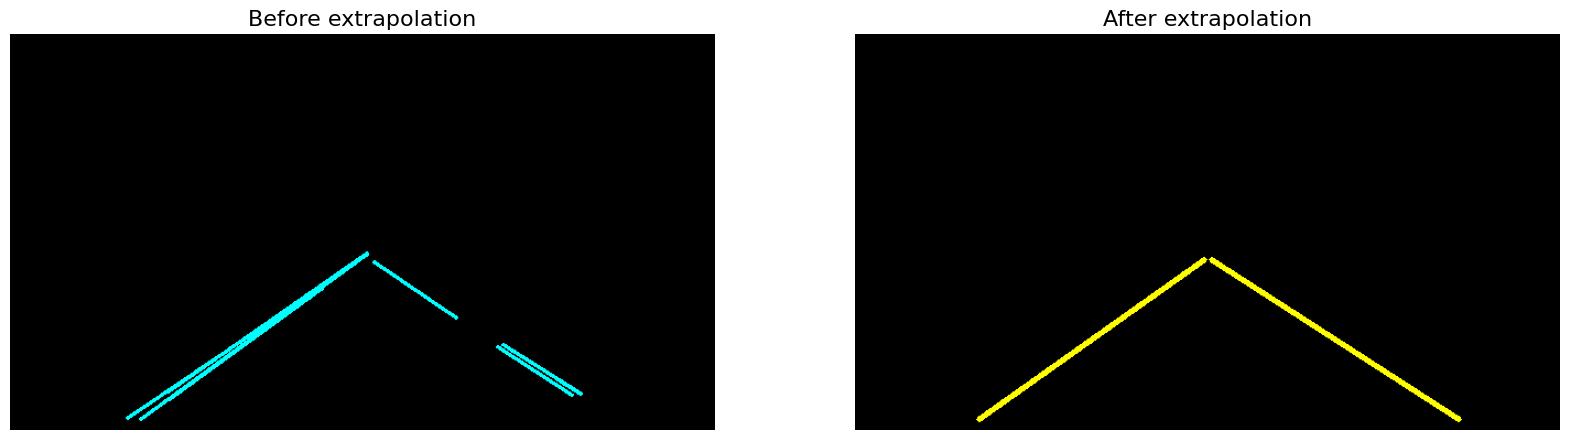

In [ ]:
# Define bounds of the region of interest.
roi_upper_border = 205
roi_lower_border = 350

# Create a blank array to contain the (colorized) results.
detect_lanes_img = np.zeros((img_lane.shape[0], img_lane.shape[1], 3), dtype = np.uint8)

# Use above defined function to identify lists of left-sided and right-sided lines.
lines_left, lines_right = separate_left_right_lines(lines)

# Use above defined function to extrapolate the lists of lines into recognized lanes.
lane_left = extrapolate_lines(lines_left, roi_upper_border, roi_lower_border)
lane_right = extrapolate_lines(lines_right, roi_upper_border, roi_lower_border)
draw_lines(detect_lanes_img, [[lane_left]], thickness = 3, color = (255,255,0))
draw_lines(detect_lanes_img, [[lane_right]], thickness = 3, color = (255,255,0))

# Display results.
fig = plt.figure(figsize = (20, 20))
plot2(hough, "Before extrapolation", detect_lanes_img, "After extrapolation")

**Combine the detected lanes with the original image**

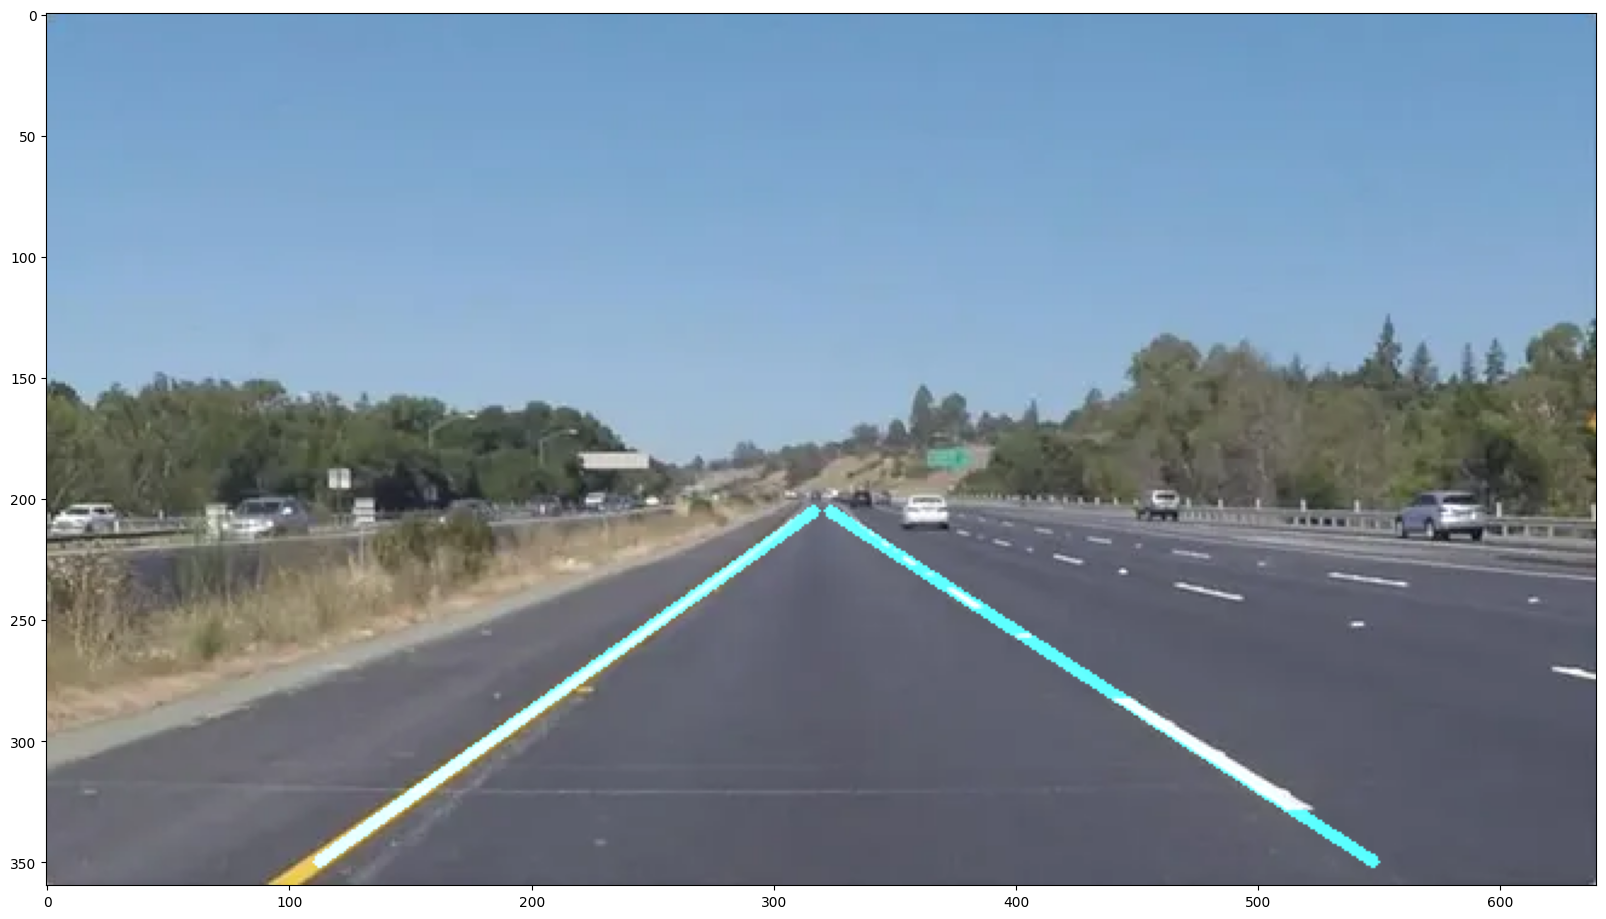

In [ ]:
alpha = 1
beta = 0.8
gamma = 0.0
image_annotated = cv2.addWeighted(img_lane, alpha, detect_lanes_img, beta, gamma)

# Display the results
fig = plt.figure(figsize = (20, 20))
plt.imshow(image_annotated[:,:,::-1])